In [1]:
import pandas as pd
import numpy as np
import csv
from matplotlib.path import Path
import matplotlib.pyplot as plt
from function import PointInTriangle, readPoints, to_decimal

# testing point 

In this script We generate points to mesure. Corners of Blonia: <br>
50°03'45.2"N 19°54'09.1"E <br>
50°03'37.3"N 19°54'03.1"E <br>
50°03'25.1"N 19°54'25.9"E <br>
50°03'33.2"N 19°55'26.0"E

In [2]:
Ay = to_decimal(50,3,45.2)
Ax = to_decimal(19,54,9.1)
By = to_decimal(50,3,37.3)
Bx = to_decimal(19,54,3.1)
Cy = to_decimal(50,3,25.1)
Cx = to_decimal(19,54,25.9)
Dy = 50.059240
Dx = 19.923921
Ey = By
Ex = 50.0637389875082

unprecise dimensions of Blonia in [m]<br><br>
AD = 1518.1<br>
AB = 243.4<br>
BC = 604.9<br>
CD = 1130.7<br>

To generate points in twenty meter grid let's assume 81 points by latitude nad 30 by longitude

In [4]:
left = Bx    # making squere that will be used to generate points that will be sorted
right = Dx
up = Ay
down = Cy

In [5]:
jump_x = (left - right)/81 # generating list of longitudes and latitudes, x and y coordinates of points
jump_y = (down - up)/30
list_x = np.array(right)
list_y = np.array(up)
for i in range(1,81):
    list_x = np.append(list_x,right + i*jump_x)
for i in range(1,30):
    list_y = np.append(list_y,up + i*jump_y)


In [6]:
grid = [] # generating squere gird of points 
for j in range(30):
    for i in range(81):
        grid.append([list_x[i],list_y[j]])

In [7]:
triangle = [[Ax,Ay],[Bx,By],[Cx,Cy],[Dx,Dy],[Ex,Ey]]
points = []
for i in range(len(grid)):
    InTriangle = PointInTriangle(grid[i], triangle[0], triangle[1], triangle[2])
    if InTriangle:
        points.append(grid[i])

for i in range(len(grid)):
    InTriangle = PointInTriangle(grid[i], triangle[0], triangle[3], triangle[2])
    if InTriangle:
        points.append(grid[i])
points = np.array(points)

In [8]:
dict = {'latitude': points.T[0], 'longitude': points.T[1]}  
df = pd.DataFrame(dict) 
df.to_csv('PoinsBlona.csv') 

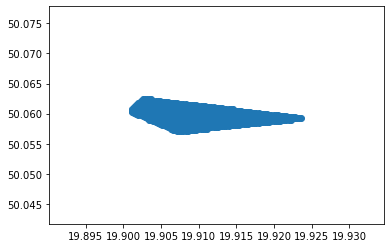

In [9]:
plt.scatter(points.T[0], points.T[1])

In [10]:
BBox = (19.899, 19.9255,      
         50.0562, 50.0637)


In [11]:
Blonia = plt.imread('map.png')

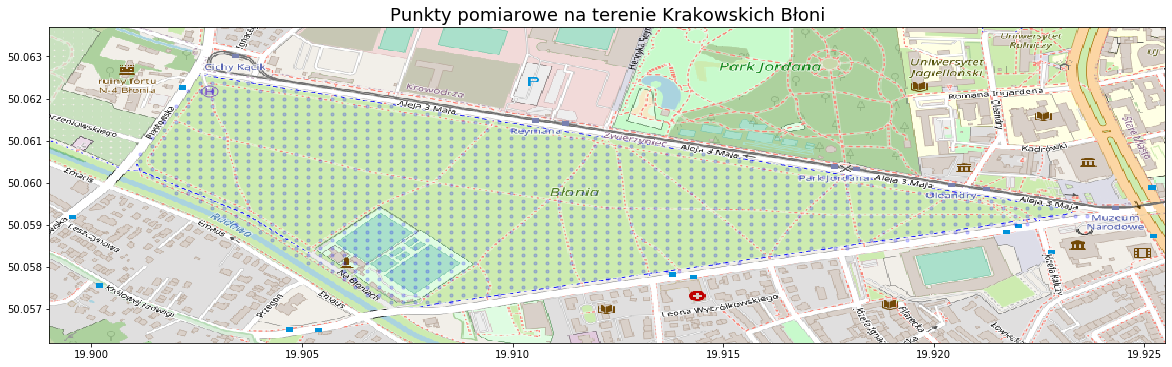

In [12]:
fig, ax = plt.subplots(figsize = (20,10))
ax.scatter(points.T[0], points.T[1], zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Punkty pomiarowe na terenie Krakowskich Błoni',fontsize=18)
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(Blonia, zorder=0, extent = BBox, aspect= 'equal')

In [13]:
data = readPoints('data/18_02_2022.csv')
id = data['data_all'][0]
id_measured = data['data_measured'][0]
longitude_measured = data['data_measured'][6]
latitude_measured = data['data_measured'][7]
vertical_measured = data['data_measured'][8]
horizontal_measured = data['data_measured'][10]

In [14]:
points_measured = []
for i in range(len(latitude_measured)):
    points_measured.append([float(longitude_measured[i]),float(latitude_measured[i])])
points_measured=np.array(points_measured)

In [15]:
vertical_measured=np.array([float(i) for i in vertical_measured])
vertical_measured_range = max(vertical_measured) - min(vertical_measured)
vertical_measured_normalized = []
for i in range(len(vertical_measured)):
    vertical_measured_normalized.append((vertical_measured[i]-min(vertical_measured))/vertical_measured_range)
colors_1=vertical_measured_normalized

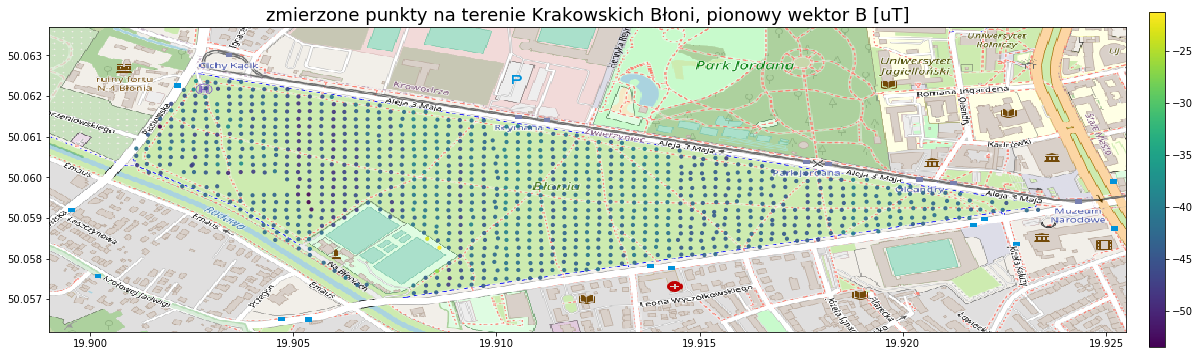

In [16]:
#colors = np.array([float(i) for i in vertical_measured])*-0.01
fig, ax = plt.subplots(figsize = (20,10))
ax.scatter(points_measured.T[0], points_measured.T[1], zorder=1, alpha= 0.9, c=colors_1, s=10)
ax.set_title('zmierzone punkty na terenie Krakowskich Błoni, pionowy wektor B [uT]',fontsize=18)
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
im = ax.imshow(Blonia, zorder=0, extent = BBox, aspect= 'equal',vmin=min(vertical_measured),vmax=max(vertical_measured))
fig.colorbar(im,ax=ax,fraction=0.015, pad=0.02)

In [17]:
horizontal_measured=np.array([float(i) for i in horizontal_measured])
horizontal_measured_range = max(horizontal_measured) - min(horizontal_measured)
horizontal_measured_normalized = []
for i in range(len(horizontal_measured)):
    horizontal_measured_normalized.append((horizontal_measured[i]-min(horizontal_measured))/horizontal_measured_range)
#colors = np.array([float(i) for i in horizontal_measured])*-0.01
colors_2=horizontal_measured_normalized

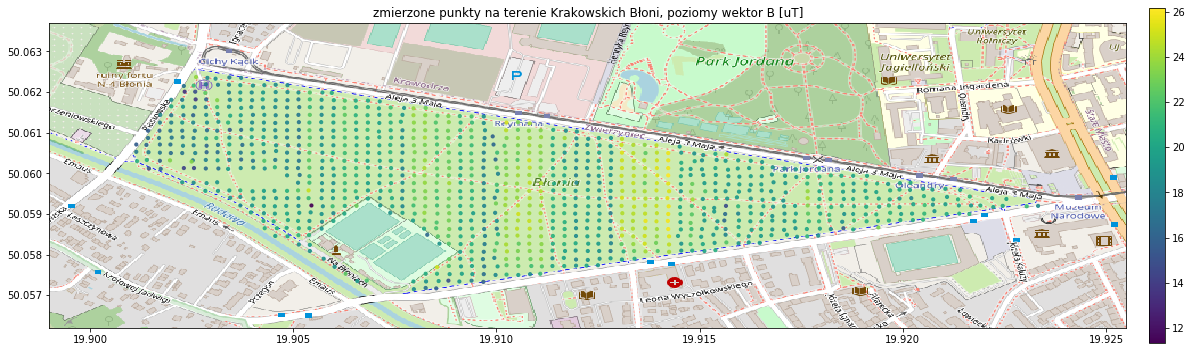

In [18]:
fig, ax = plt.subplots(figsize = (20,10))
ax.scatter(points_measured.T[0], points_measured.T[1], zorder=1, alpha= 0.9, c=colors_2, s=10)
ax.set_title('zmierzone punkty na terenie Krakowskich Błoni, poziomy wektor B [uT]')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
im = ax.imshow(Blonia, zorder=0, extent = BBox, aspect= 'equal', vmin=min(horizontal_measured),vmax=max(horizontal_measured))
fig.colorbar(im,ax=ax,fraction=0.015, pad=0.02)

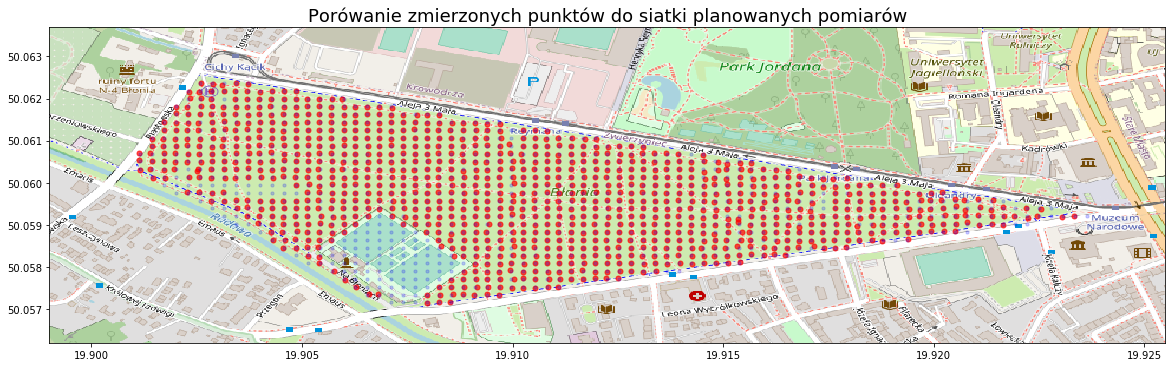

In [19]:
fig, ax = plt.subplots(figsize = (20,10))
ax.scatter(points_measured.T[0], points_measured.T[1], zorder=1, alpha= 0.7, c='r', s=25)
ax.scatter(points.T[0], points.T[1], zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Porówanie zmierzonych punktów do siatki planowanych pomiarów',fontsize=18)
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
im = ax.imshow(Blonia, zorder=0, extent = BBox, aspect= 'equal')


In [20]:
print("Horizontal max: ", max([float(i) for i in horizontal_measured]))
print("Horizontal min: ", min([float(i) for i in horizontal_measured]))
print("Horizontal mean: ", sum([float(i) for i in horizontal_measured])/len(horizontal_measured))
print("Vertical max: ", max([float(i) for i in vertical_measured]))
print("Vertical min: ", min([float(i) for i in vertical_measured]))
print("Vertical mean: ", sum([float(i) for i in vertical_measured])/len(vertical_measured))
print("Points unmeasured: ",len(data['data_all'][0])-len(data['data_measured'][0]))
print("Points measured: ",len(horizontal_measured))


Horizontal max:  26.1618
Horizontal min:  11.33816
Horizontal mean:  20.43086454720617
Vertical max:  -21.27151
Vertical min:  -53.45426
Vertical mean:  -43.11161793834294
Points unmeasured:  128
Points measured:  1038


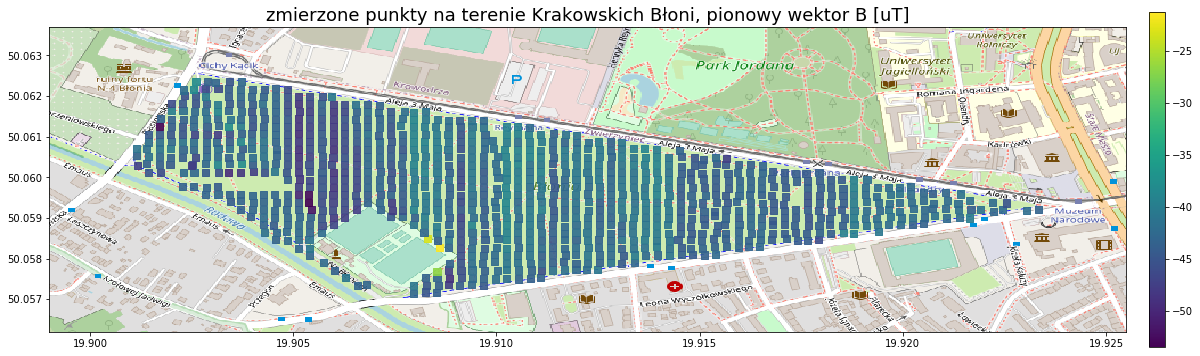

In [21]:
#colors = np.array([float(i) for i in vertical_measured])*-0.01
fig, ax = plt.subplots(figsize = (20,10))
ax.scatter(points_measured.T[0], points_measured.T[1], zorder=1, alpha= 0.9, marker = 's', c=colors_1, s=50)
ax.set_title('zmierzone punkty na terenie Krakowskich Błoni, pionowy wektor B [uT]',fontsize=18)
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
im = ax.imshow(Blonia, zorder=0, extent = BBox, aspect= 'equal',vmin=min(vertical_measured),vmax=max(vertical_measured))
fig.colorbar(im,ax=ax,fraction=0.015, pad=0.02)

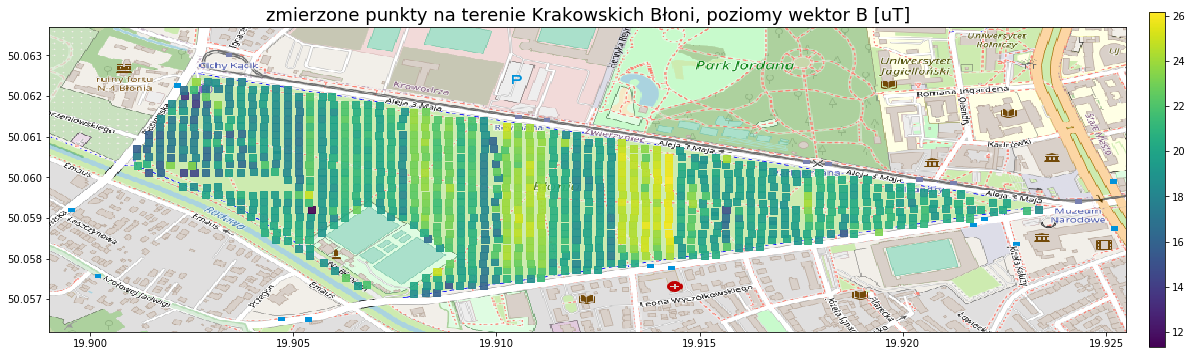

In [22]:
fig, ax = plt.subplots(figsize = (20,10))
ax.scatter(points_measured.T[0], points_measured.T[1], zorder=1, alpha= 0.9,marker = 's', c=colors_2, s=50)
ax.set_title('zmierzone punkty na terenie Krakowskich Błoni, poziomy wektor B [uT]',fontsize=18)
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
im = ax.imshow(Blonia, zorder=0, extent = BBox, aspect= 'equal', vmin=min(horizontal_measured),vmax=max(horizontal_measured))
fig.colorbar(im,ax=ax,fraction=0.015, pad=0.02)

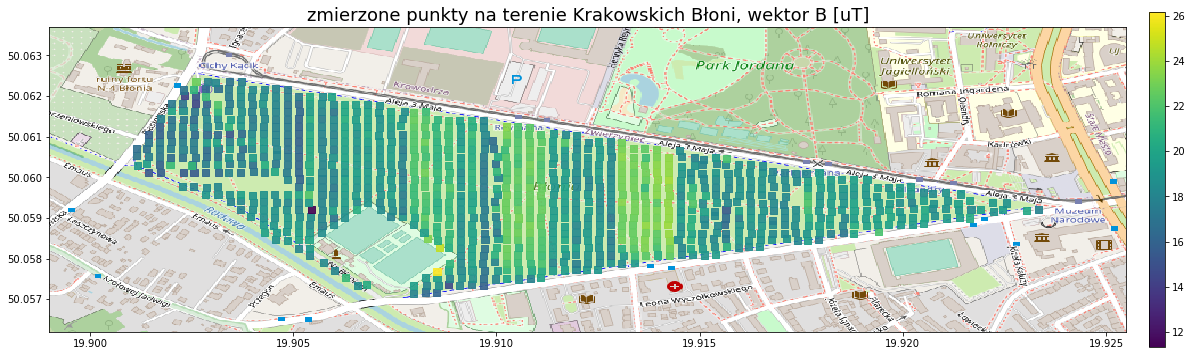

In [23]:
col_1 = np.array(colors_1)**2
col_2 = np.array(colors_2)**2
col_3 = (col_1+col_2)**(1/2)

fig, ax = plt.subplots(figsize = (20,10))
ax.scatter(points_measured.T[0], points_measured.T[1], zorder=1, alpha= 0.9,marker = 's', c=col_3, s=50)
ax.set_title('zmierzone punkty na terenie Krakowskich Błoni, wektor B [uT]',fontsize=18)
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
im = ax.imshow(Blonia, zorder=0, extent = BBox, aspect= 'equal', vmin=min(horizontal_measured),vmax=max(horizontal_measured))
fig.colorbar(im,ax=ax,fraction=0.015, pad=0.02)